In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqldf
import pandasql as ps

In [2]:
df=pd.read_csv("mortgage_data_fico.csv")
df1=pd.read_csv("FICO_excellent.csv")
df2=pd.read_csv("FICO_good.csv")
df3=pd.read_csv("FICO_low.csv")

In [3]:
z=df["LTV_time"].mean()
print(z)
y=df["LTV_dif"].mean()
print(y)
x=df["hpi_inc"].mean()
x

80.96823268231223
-1.0940516571253065


0.01706037702953518

In [4]:
df1

,Unnamed: 0,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time,FICO_group
0,1,30,-15,25,105,57423.36,21.970054,9.20,212.73,2.274218,...,-0.215553,4.7,4.600000,0.0,0.0000,220.591667,134.95,1.735022,2,3
1,2,31,22,25,142,167960.37,86.398113,9.60,200.67,1.850689,...,-0.361641,4.7,4.614286,0.0,0.0000,217.745714,-16.10,-0.074272,2,3
2,3,30,20,23,140,219999.86,74.915573,9.75,212.73,2.274218,...,-0.238656,5.0,4.662500,-0.3,-0.0600,221.151250,13.52,0.067868,2,3
3,4,25,21,23,141,187909.46,73.179630,6.70,226.29,2.899137,...,-0.029451,5.0,4.800000,-0.3,-0.0600,223.983333,17.43,0.083453,2,3
4,5,23,23,23,141,176000.00,80.000000,6.25,221.91,2.987109,...,0.000000,5.0,5.000000,0.0,0.0000,221.910000,0.00,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,5061,58,29,52,149,459975.91,92.311352,2.75,188.37,2.868594,...,1.653527,8.0,7.014286,-1.8,-0.2250,178.762857,-29.00,-0.133413,2,3
5061,5062,57,28,52,149,536659.62,93.865507,6.75,187.20,2.556052,...,1.364417,8.0,7.150000,-1.8,-0.2250,177.161667,-32.47,-0.147813,2,3
5062,5063,56,20,52,141,158103.07,73.851443,3.00,181.43,1.717053,...,0.588320,8.0,7.340000,-1.4,-0.1750,175.154000,-17.78,-0.089253,2,3
5063,5064,54,28,52,148,789000.00,84.464989,6.00,179.97,1.507359,...,0.394348,8.0,7.633333,-0.7,-0.0875,171.423333,-39.70,-0.180726,2,3


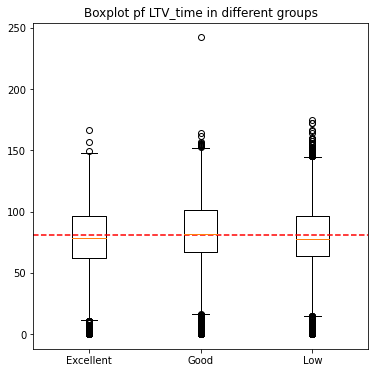

In [5]:
plt.figure(figsize=(6,6))
plt.boxplot([df1["LTV_time"],df2["LTV_time"],df3["LTV_time"]],labels=["Excellent","Good","Low"])
plt.title("Boxplot pf LTV_time in different groups",fontsize=12)
plt.plot([0.5,3.5],[z,z],"r--")
plt.show()

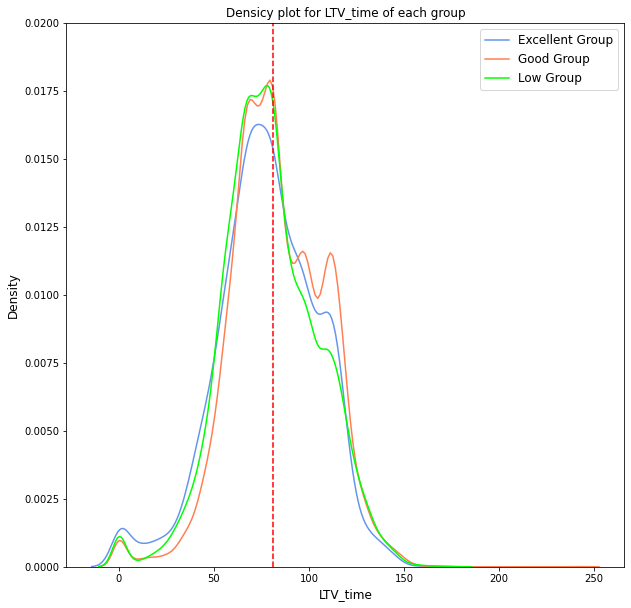

In [6]:
plt.figure(figsize=(10,10))
sns.kdeplot(df1["LTV_time"], color="cornflowerblue", label="Excellent Group")
sns.kdeplot(df2["LTV_time"], color="coral", label='Good Group')
sns.kdeplot(df3["LTV_time"], color="lime", label='Low Group')
plt.title("Densicy plot for LTV_time of each group",fontsize=12)
plt.legend(loc = 'upper right',fontsize=12)
plt.plot([z,z],[0,0.021],"r--")
plt.xlabel('LTV_time',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.ylim(0,0.02)
plt.show()

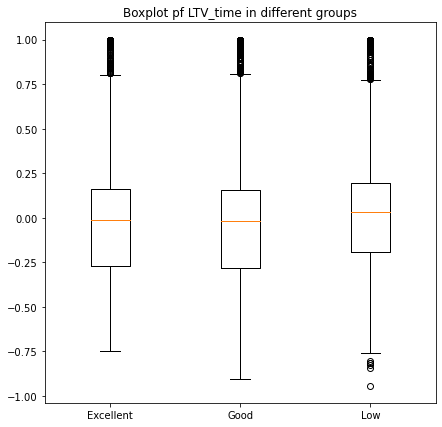

In [7]:
plt.figure(figsize=(7,7))
plt.boxplot([df1["LTV_inc"],df2["LTV_inc"],df3["LTV_inc"]],labels=["Excellent","Good","Low"])
plt.title("Boxplot pf LTV_time in different groups",fontsize=12)
plt.show()

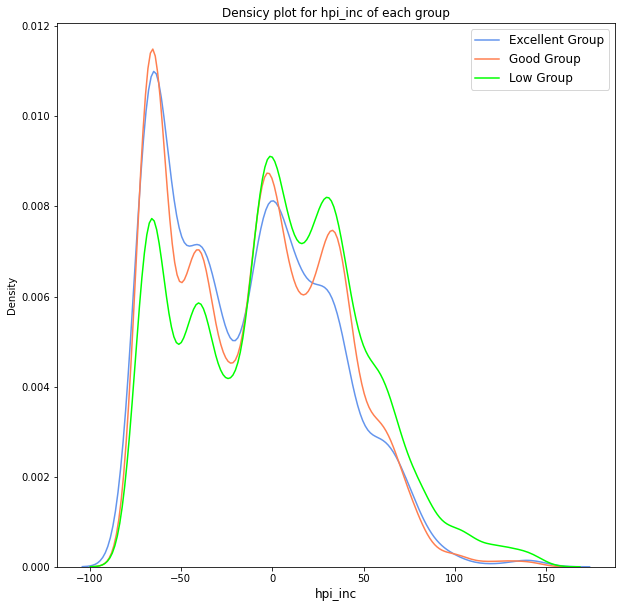

In [8]:
plt.figure(figsize=(10,10))
sns.kdeplot(df1["hpi_dif"], color="cornflowerblue", label="Excellent Group")
sns.kdeplot(df2["hpi_dif"], color="coral", label='Good Group')
sns.kdeplot(df3["hpi_dif"], color="lime", label='Low Group')
plt.title("Densicy plot for hpi_inc of each group",fontsize=12)
plt.legend(loc = 'upper right',fontsize=12)
plt.xlabel('hpi_inc',fontsize=12)
plt.show()

In [9]:
df1=ps.sqldf("SELECT * FROM df1 where status_time=1")
df2=ps.sqldf("SELECT * FROM df2 where status_time=1")
df3=ps.sqldf("SELECT * FROM df3 where status_time=1")

In [10]:
df1

,Unnamed: 0,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time,FICO_group
0,8,44,28,32,148,122111.59,142.258186,7.250,150.91,1.875515,...,0.698586,5.0,8.176923,4.2,0.840000,162.235385,-68.76,-0.313015,1,3
1,9,34,28,32,148,190493.49,101.001807,7.875,173.35,-0.314448,...,-1.284784,5.0,5.266667,0.8,0.160000,179.996667,-46.32,-0.210862,1,3
2,10,54,27,31,107,78252.83,65.336140,6.875,179.97,1.507359,...,-0.185515,4.7,8.054167,2.6,0.553191,162.624583,-42.42,-0.190746,1,3
3,12,33,25,28,146,385579.49,123.933683,8.900,180.52,0.836859,...,-0.319169,4.6,4.750000,0.4,0.086957,202.846667,-45.77,-0.202263,1,3
4,13,31,26,28,146,348558.74,111.712296,9.999,200.67,1.850689,...,0.505639,4.6,4.625000,0.1,0.021739,212.610000,-24.43,-0.108530,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,5034,48,25,27,185,295130.65,120.007035,5.000,146.45,2.715903,...,1.209538,4.6,7.472727,3.7,0.804348,172.200000,-79.84,-0.352822,1,3
1008,5035,29,25,27,145,425311.18,82.759675,7.490,217.37,1.692969,...,-0.283163,4.4,4.500000,0.1,0.022727,219.810000,-8.92,-0.039418,1,3
1009,5036,32,25,27,145,580000.00,97.266280,8.550,186.12,1.104163,...,-0.101702,4.6,4.650000,0.4,0.086957,209.825000,-40.17,-0.177516,1,3
1010,5037,40,26,28,146,175999.66,115.280489,7.625,156.21,1.585966,...,0.290271,4.6,6.684615,5.2,1.130435,179.268462,-68.89,-0.306042,1,3


D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

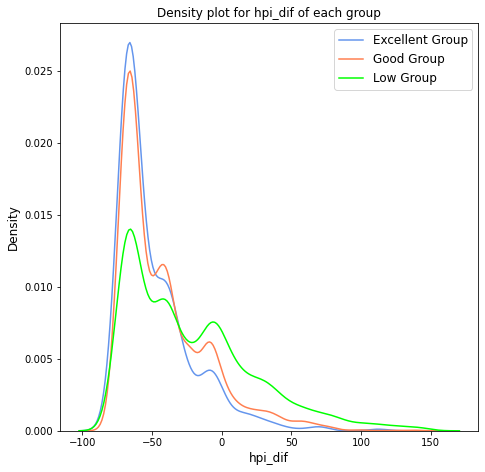

In [11]:
plt.figure(figsize=(7.5,7.5))
sns.distplot(df1["hpi_dif"],hist=False, color="cornflowerblue", label="Excellent Group")
sns.distplot(df2["hpi_dif"],hist=False, color="coral", label='Good Group')
sns.distplot(df3["hpi_dif"],hist=False, color="lime", label='Low Group')
plt.title("Density plot for hpi_dif of each group",fontsize=12)
plt.legend(loc = 'upper right',fontsize=12)
plt.xlabel('hpi_dif',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.show()

D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

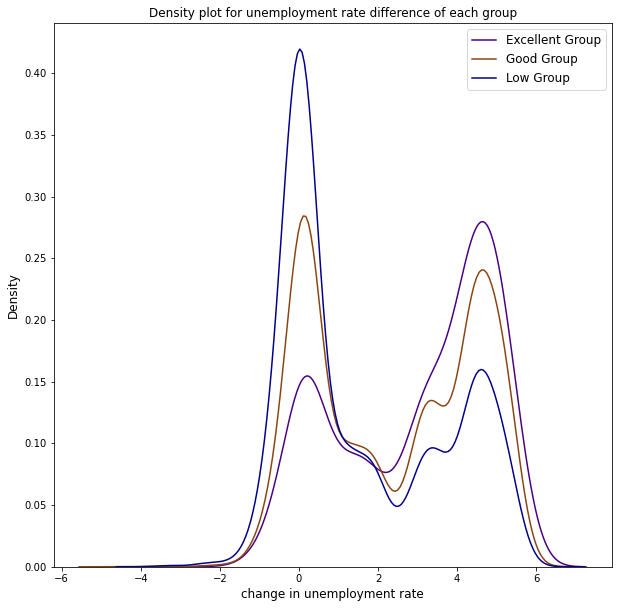

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(df1["uer_dif"], hist=False, kde=True, color="indigo", label="Excellent Group")
sns.distplot(df2["uer_dif"], hist=False, kde=True, color="saddlebrown", label='Good Group')
sns.distplot(df3["uer_dif"], hist=False, kde=True, color="darkblue", label='Low Group')
plt.title("Density plot for unemployment rate difference of each group",fontsize=12)
plt.legend(loc = 'upper right',fontsize=12)
#plt.plot([y,y],[0,0.023],"r--")
plt.xlabel('change in unemployment rate',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.show()